# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [4]:
# Preview the dataset
data

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6
1924-01-01,47.6
1928-01-01,47.8
1932-01-01,46.2
1936-01-01,46.5


Plot this time series data. 

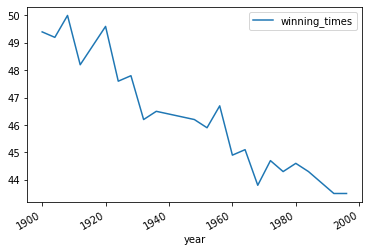

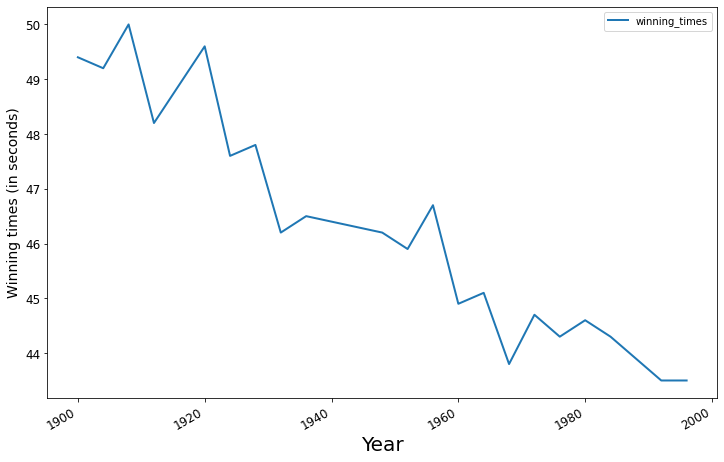

In [9]:
# Plot the time series
data.plot()

data.plot(figsize=(12,8), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Winning times (in seconds)', fontsize=14);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [10]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

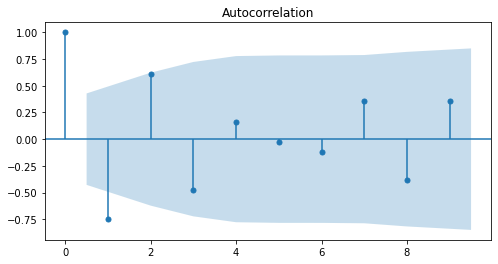

In [17]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(data_diff,ax=ax, lags=9);

/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


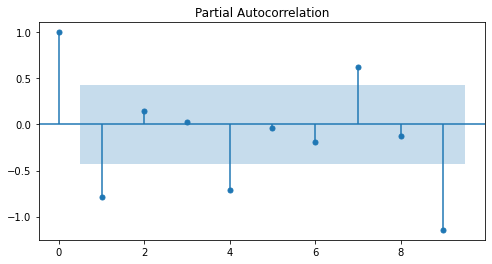

In [16]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,4))
plot_pacf(data_diff,ax=ax, lags=9);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [21]:
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# Fit an ARMA(1,0) model
mod_arma = ARMA(data_diff, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.56186D-01    |proj g|=  1.76862D-02

At iterate    5    f=  9.54937D-01    |proj g|=  9.43690D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   3.331D-08   9.549D-01
  F =  0.95493659696887956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observati

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [22]:
# Fit an ARMA(2,1) model
mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69692D-01    |proj g|=  1.25881D-01

At iterate    5    f=  9.44464D-01    |proj g|=  3.45918D-02

At iterate   10    f=  9.15998D-01    |proj g|=  2.87726D-02

At iterate   15    f=  9.03476D-01    |proj g|=  1.00323D-01

At iterate   20    f=  9.02661D-01    |proj g|=  3.18997D-03

At iterate   25    f=  9.02637D-01    |proj g|=  5.72653D-05

At iterate   30    f=  9.02636D-01    |proj g|=  1.14675D-04

At iterate   35    f=  9.02636D-01    |proj g|=  5.60663D-06

At iterate   40    f=  9.02636D-01    |proj g|=  8.53762D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [23]:
# Fit an ARMA(2,2) model
mod_arma = ARMA(data_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55386D-01    |proj g|=  1.62825D-01

At iterate    5    f=  8.04054D-01    |proj g|=  5.80852D-02

At iterate   10    f=  7.84387D-01    |proj g|=  6.87688D-03

At iterate   15    f=  7.84358D-01    |proj g|=  1.98730D-06

At iterate   20    f=  7.84358D-01    |proj g|=  8.43770D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     43      1     0     0   8.438D-07   7.844D-01
  F =  0.78435839276509023     

CONVERG

## What is your final model? Why did you pick this model?

In [24]:
# Your comments here
'''They all fit fairly well.  Between the 1,0 and 2,2 models, the 22 has lower(better) AIC while the 10 has better BIC.
So, either could be chosen with good justification.  One could pick the simpler one as a tie breaker.
For fun, I tried some 9,x models but they did not work.'''

'They all fit fairly well.  Between the 1,0 and 2,2 models, the 22 has lower(better) AIC while the 10 has better BIC.\nSo, either could be chosen with good justification.  One could pick the simpler one as a tie breaker.'

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 